# Ejercicio 2 - Ascensor

En un edificio existen tres ascensores que funcionan de manera simultanea. Se quiere crear un sistema que para cada  llamada realizada por cualquier usuario en cualquier piso asigne a cada ascensor un nivel de prioridad dependiendo de el estado en el que se encuentre y seleccione a aquel con mayor prioridad a la respuesta de dicho llamado.

Los elementos a tener en cuenta son:

### Distancia relativa

Distancia entre la llamada y la ubicación actual del ascensor.
Se calcula como:

<b>DR</b> = 0 Si el ascensor está en camino al piso llamado
   IF Está quieto 
      <b>DR</b>= |PISO ACTUAL - PISO DEL LLAMADO|
   ELSE DR= |PISO DESTINO MAS CERCANO - PISO DEL LLAMADO|

Los conjuntos de pertenencia estarán dados de la siguiente manera:

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Triangular</td><td>[0 0 2]</td><td>Baja</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[1 3 6]</td><td>Media</td>
    </tr>
     <tr>
        <td>Trapecio</td><td>[5 8 9 9]</td><td>Alta</td>
    </tr>
</table>


### Tiempo de espera


<b>TE</b> =|PISO ACTUAL - PISO DEL LLAMADO|

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Trapecio</td><td>[0 0 2 4]</td><td>Corto</td>
    </tr>
    <tr>
        <td>Triangualar</td><td>[2 4.5 7]</td><td>Medio</td>
    </tr>
     <tr>
        <td>Trapecio</td><td>[5 7 9 9]</td><td>Largo</td>
    </tr>
</table>

<br>

### Espacio libre

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Trapecio</td><td>[0 0 2 4]</td><td>Baja</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[2 4.5 7]</td><td>Media</td>
    </tr>
     <tr>
        <td>Trapecio</td><td>[5 7 9 9]</td><td>Alta</td>
    </tr>
</table>

<br>

### Prioridad

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Triangular</td><td>[0 0 0.5]</td><td>Baja</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[0.25 0.5 0.75]</td><td>Media</td>
    </tr>
     <tr>
        <td>Triangular</td><td>[0.5 1 1]</td><td>Alta</td>
    </tr>
</table>



 - Definir un conjunto de reglas para establecer las prioridades a asignar en cada caso
 - Hacer diversas pruebas y verificar que los resultados sean consistentes

In [11]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt

<b>Fuente:</b> https://github.com/shubhamgupta1404/Fuzzy-Elevator-Control-System/blob/master/FuzzyLogicElevatorSystemPaper.pdf

/home/fernando/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


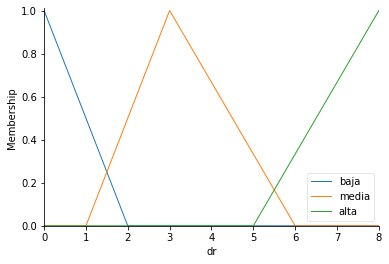

In [12]:
dr = ctrl.Antecedent(np.arange(0, 9, 1), 'dr')
dr['baja'] = fuzz.trimf(dr.universe, [0, 0, 2])
dr['media'] = fuzz.trimf(dr.universe, [1, 3, 6])
dr['alta'] = fuzz.trapmf(dr.universe, [5, 8, 9, 9])
dr.view()


/home/fernando/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


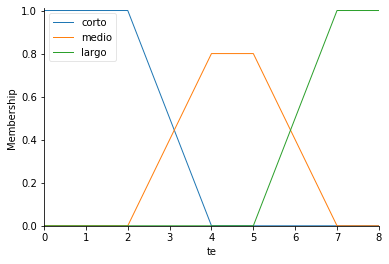

In [13]:
te = ctrl.Antecedent(np.arange(0, 9, 1), 'te')
te['corto'] = fuzz.trapmf(te.universe, [0, 0, 2, 4])
te['medio'] = fuzz.trimf(te.universe, [2, 4.5, 7])
te['largo'] = fuzz.trapmf(te.universe, [5, 7, 9, 9])
te.view()

/home/fernando/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


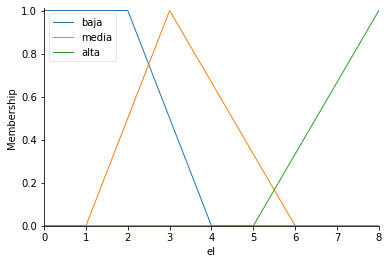

In [14]:
el = ctrl.Antecedent(np.arange(0, 9, 1), 'el')
el['baja'] = fuzz.trapmf(el.universe, [0, 0, 2, 4])
el['media'] = fuzz.trimf(el.universe, [1, 3, 6])
el['alta'] = fuzz.trapmf(el.universe, [5, 8, 9, 9])
el.view()

/home/fernando/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


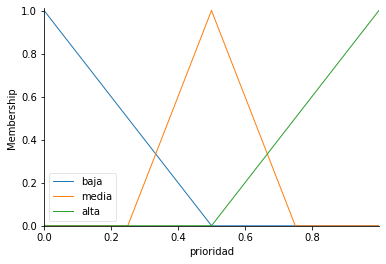

In [15]:
prioridad = ctrl.Consequent(np.arange(0, 1, 0.0001), 'prioridad')
prioridad['baja'] = fuzz.trimf(prioridad.universe, [0, 0, 0.5])
prioridad['media'] = fuzz.trimf(prioridad.universe, [0.25, 0.5, 0.75])
prioridad['alta'] = fuzz.trimf(prioridad.universe, [0.5, 1, 1])
prioridad.view()


- DR baja & TE corto & EL alta = PRIORIDAD alta
- TE corto & EL alto = PRIORIDAD alta
- DR baja & TE corto = PRIORIDAD alta
- DR baja & EL medio = PRIORIDAD alta
- DR alto & TE bajo = PRIORIDAD alta

- DR media & TE medio & EL media = PRIORIDAD media
- DR baja & TE medio & EL alta = PRIORIDAD media
- DR alta & TE medio & EL baja = PRIORIDAD media
- DR media & EL alto = PRIORIDAD media

- DR alta & TE largo & EL baja = PRIORIDAD baja
- EL baja = PRIORIDAD baja
- TE largo & EL bajo = PRIORIDAD baja
- DR alta & TE largo = PRIORIDAD baja
- DR alta & EL bajo = PRIORIDAD baja
- DR media & EL bajo = PRIORIDAD baja
- DR alta & EL medio = PRIORIDAD baja


 





In [16]:
prioridad.defuzzify_method = 'centroid'

rules = []
'''
rules.append(ctrl.Rule(dr['baja'] & te['corto'] & el['alta'], prioridad['alta']))
rules.append(ctrl.Rule(te['corto'] & el['alta'], prioridad['alta']))
rules.append(ctrl.Rule(dr['baja'] & te['corto'], prioridad['alta']))
rules.append(ctrl.Rule(dr['baja'] & te['medio'], prioridad['alta']))
rules.append(ctrl.Rule(dr['alta'] & te['corto'], prioridad['alta']))

rules.append(ctrl.Rule(dr['media'] & te['medio'] & el['media'], prioridad['media']))
rules.append(ctrl.Rule(dr['baja'] & te['medio'] & el['alta'], prioridad['media']))
rules.append(ctrl.Rule(dr['alta'] & te['medio'] & el['baja'], prioridad['media']))
rules.append(ctrl.Rule(dr['media'] & el['alta'], prioridad['media']))
             
rules.append(ctrl.Rule(dr['alta'] & te['largo'] & el['baja'], prioridad['baja']))
rules.append(ctrl.Rule(el['baja'], prioridad['baja']))
rules.append(ctrl.Rule(te['largo'] & el['baja'], prioridad['baja']))
rules.append(ctrl.Rule(dr['alta'] & te['largo'], prioridad['baja']))
rules.append(ctrl.Rule(dr['alta'] & el['baja'], prioridad['baja']))
rules.append(ctrl.Rule(dr['media'] & el['baja'], prioridad['baja']))
rules.append(ctrl.Rule(dr['alta'] & el['media'], prioridad['baja'])) '''

rules.append(ctrl.Rule(dr['baja'], prioridad['alta']))
rules.append(ctrl.Rule(dr['media'], prioridad['media']))
rules.append(ctrl.Rule(dr['alta'], prioridad['baja']))
rules.append(ctrl.Rule(te['corto'],prioridad['alta']))
rules.append(ctrl.Rule(te['medio'], prioridad['media']))
rules.append(ctrl.Rule(te['largo'], prioridad['baja']))
rules.append(ctrl.Rule(el['baja'], prioridad['baja']))
rules.append(ctrl.Rule(el['media'], prioridad['media']))
rules.append(ctrl.Rule(el['alta'], prioridad['alta']))

 Antecedents 
Antecedent: dr                      = 1
  - baja                            : 0.5
  - media                           : 0.0
  - alta                            : 0.0
Antecedent: te                      = 2
  - corto                           : 1.0
  - medio                           : 0.0
  - largo                           : 0.0
Antecedent: el                      = 8
  - baja                            : 0.0
  - media                           : 0.0
  - alta                            : 1.0

 Rules 
RULE #0:
  IF dr[baja] THEN prioridad[alta]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - dr[baja]                                               : 0.5
                                                  dr[baja] = 0.5
  Activation (THEN-clause):
                                           prioridad[alta] : 0.5

RULE #1:
  IF dr[media] THEN prioridad[media]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Ag

/home/fernando/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


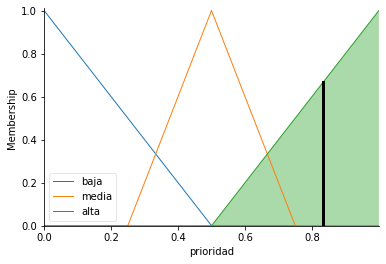

In [17]:
ctrSys = ctrl.ControlSystem(rules)
ascensor = ctrl.ControlSystemSimulation(ctrSys)

ascensor.input['dr'] = 1
ascensor.input['te'] = 2
ascensor.input['el'] = 8

ascensor.compute()
ascensor.print_state() #Archivo control/controlsystem.py modificado
prioridad.view(sim=ascensor)
print("Resultado: " + str(ascensor.output['prioridad']))

- dr = 1
- te = 1
- el = 1
- prioridad =  0.44041224330399575 

- prioridad =  0.49990000000066626


- dr = 2
- te = 1
- el = 1
- prioridad = 0.16666666666666624

- prioridad = 0.49991724423562584

- dr = 9
- te = 1
- el = 1
- prioridad = 0.49990000000066626

- prioridad = 0.49990000000066626

- dr = 2
- te = 7
- el = 1
- prioridad = 0.16666666666666624

- prioridad = 0.30409356774411334

- dr = 4
- te = 7
- el = 9
- prioridad = 0.4999999999999989

- prioridad = 0.4999217425354262

- dr = 1
- te = 2
- el = 9
- prioridad =  0.8332666666666669

- prioridad = 0.8332666666666669
 

- dr = 1
- te = 2
- el = 8
- prioridad =  0.8332666666666669

- prioridad = 0.8332666666666669